# Music Representation

For music, data can be represented using either a continuous or discrete form. The most common continuous form is an audio signal, typically stored as a WAV file. Common discrete forms include Musical Instrument Digital Interface (MIDI) files, pianoroll, and text. We will focus on MIDI files and will extract two types of symbolic objects: notes and chords.

__MIDI (Musical Instrument Digital Interface)__ is a protocol which allows electronic instruments and other digital musical tools to communicate with each other. Since a MIDI file only represents player information, i.e., a series of messages like ‘note on’, ‘note off, it is more compact, easy to modify, and can be adapted to any instrument. Before we move forward, let us understand some music related terminologies:

__A note__ is a symbolic representation of a sound. For our purposes, a note can be described by its pitch and duration. __A note's pitch__ is related to the frequency of oscillation of its sound wave, which is measured in hertz (Hz). Notes with higher pitches have sound waves with more oscillations per second. __A note's duration__ is the length of the period over which it is played.

MIDI files represent a note's pitch with an integer between 0 and 127. Notes may also be represented by a pitch letter and octave number. Within the same octave, the pitches are ordered from lowest to highest frequency as follows:
<ul>
    <li> C </li>
    <li> C#/D♭ </li>
    <li> D </li>
    <li> E♭/D# </li>
    <li> E </li>
    <li> F </li>
    <li> F#/G♭ </li>
    <li> G </li>
    <li> A♭/G# </li>
    <li> A </li>
    <li> B♭/A# </li>
    <li> B </li>
</ul>

_Note:_
   B♭/A# means that A# is __enharmonically equivalent__ to (i.e. has the same pitch as) B♭, although harmonically and in the composer’s intention they are different.

The octave is indicated by a subscript, such as the 4 in A4 or the 7 in C7. A higher octave corresponds to a higher frequency. If we take an arbitrary pitch, Xi, then the pitch Xi+1, which is exactly one octave higher, represents a sound wave with twice the frequency of Xi.

In addition to a note's pitch, we will also make use of its duration. The duration is a relative value, which is normalized by the length of a whole note. The longest note is a "large" note, which is eight times as long as a whole note. The shortest note is a two hundred fifty-sixth note, which is 1/256th the length of a whole note.

__A chord__ is a combination of two or more notes played simultaneously on the same instrument. If we look at __monophonic music__ - that is, music played on a single instrument - we may identify chords by assuming that all notes played at the exact same time are part of the same chord. This assumption is not valid if we have __polyphonic music__, which consists of two or more instruments playing simultaneously.

Supervised machine learning models can be divided into two categories: discriminative models and generative models. __Discriminative models__ identify a decision boundary and produce a corresponding classification. __Generative models__ create new instances of a class.

A discriminative model of music could be used to classify songs into different genres. A generative model might compose songs of a particular genre. In this tutorial, we'll make use of generative models to compose music.

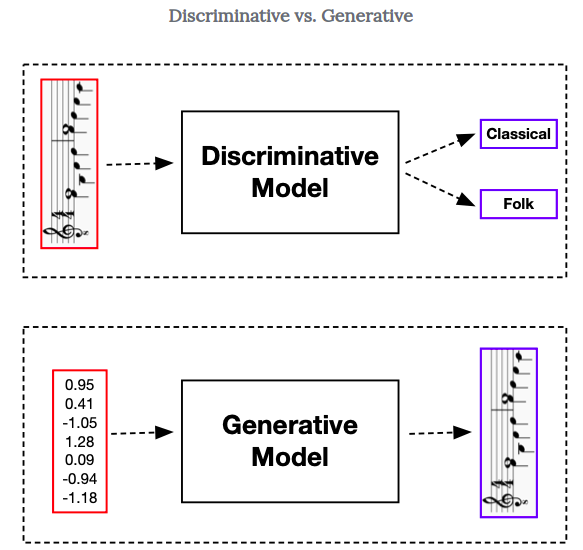

# Data Collection

We will use data from [Project Mutopia](https://www.mutopiaproject.org/), which contains 2 124 publicly available compositions in MIDI (Musical Instrument Digital Interface) format. As it is possible to filter compositions based on instruments, we will use a simple python script to collect all guitar compositions.

## Note and Chord Encoding

So, we decided to use MIDI files for music representation. The issue still remains of how to encode this representation. The encoding of a representation (of a musical content) consists in the mapping of the representation (composed of a set of variables, e.g., pitch or dynamics) into a set of inputs (also named input nodes or input variables) for the neural network architecture.

With respect to the choice of encoding, [Briot, Hadjerest, and Pachet (2019)](https://arxiv.org/pdf/1709.01620.pdf) discuss four different options that are commonly used in generative models of music:

<ul>
    <li> One-hot Encoding </li>
    <li> Many-hot Encoding </li>
    <li> Multi-one-hot Encoding </li>
    <li> Multi-many-one-hot Encoding </li>
</ul>

__One-hot encoding__ represents musical symbols, such as notes and chords, as sparse vectors with a one in the position that corresponds to a particular note or chord. __Many-hot encoding__ represents chords, which consist of multiple notes, by placing a one in the position that corresponds to each of the notes.

In the diagram below, we compare many-hot and one-hot encodings for the case where we have notes and two-note chords. With many-hot encodings, the notes C4 and D4 are represented by vectors with 128 elements. Both vectors have zeros in all positions other than the positions that correspond to the C4 and D4 elements, which contain ones. The C4+D4 chord, which is the product of playing notes C4 and D4 simultaneously, is constructed by placing ones in both the C4 and D4 positions.

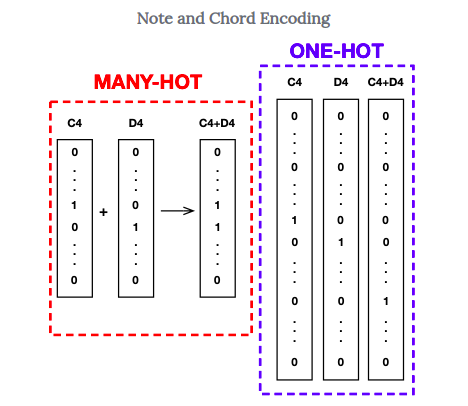

The one-hot representation of single notes and two-note chords consists of 8256-element vectors. In each case, a vector is sparse and contains a 1 in the position that corresponds to a unique note or chord. Notice that the many-hot representation requires the use of a multi-label model, where multiple classes may be predicted for a given output. It does, however, substantially reduce the size of the input and output vectors.

__Multi-one-hot encodings__ and __multi-many-hot encodings__ are the generalizations of one-hot and many-hot encoding to the case where we have polyphonic. We will restrict ourselves to monophonic music and will not discuss these options.

# Models

We'll consider three different models of music generation, starting with the simplest:

<ul>
    <li> The Autoencoder </li>
    <li> The Variational Autoencoder (VAE) </li>
    <li> The Long Short-Term Memory Model (LSTM) </li>
</ul>

We trained each model over the same data set from which the polyphonic melodies were ejected.

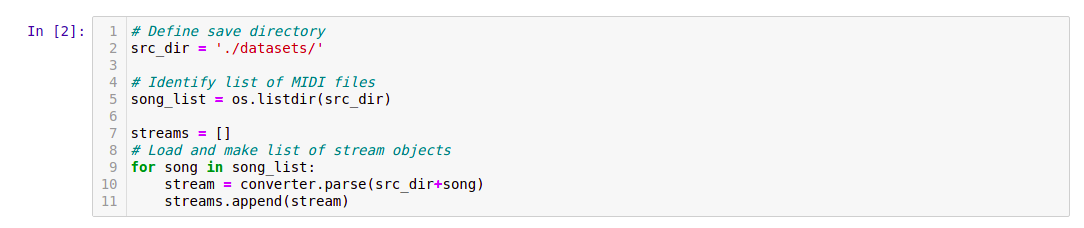

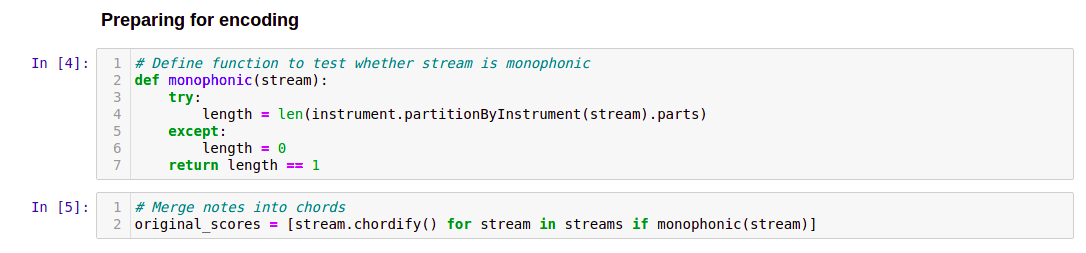

Also, the functions that map notes to numbers and vice versa are the same for all three models.

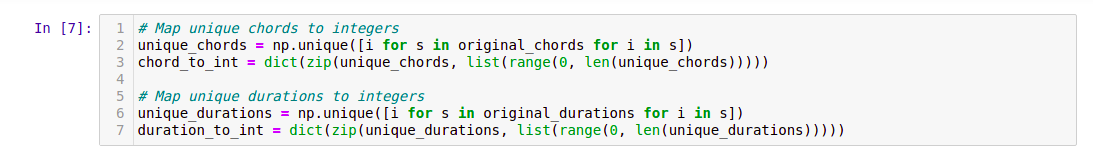

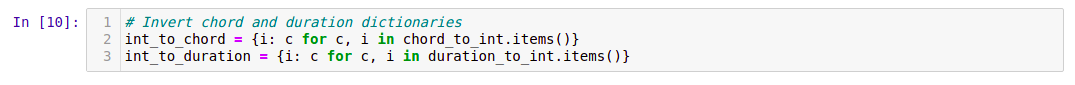

### Autoencoder

The following should be noted: <br>
    &emsp;&emsp;The autoencoder is trained to generate outputs that are highly similar to the input; however, our objective is to generate new music. To do this, we'll pass a randomly-generated latent vector to the decoder model, which we defined as a subnetwork of the autoencoder model.<br>
    &emsp;&emsp;We reshaped the output of the autoencoder into an array with the same dimensions as our original input. We then took the argmax() over the first dimension of the array. This returns an integer value that corresponds to a chord.

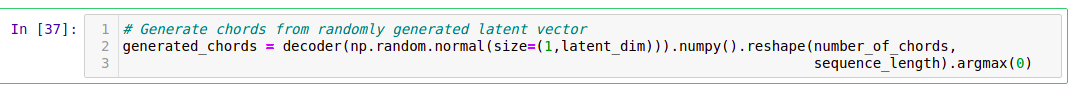

### Variational Autoencoder

While autoencoders are well-suited to denoising, compression, and decompression tasks, they do not perform well as generative models. Variational autoencoders (VAEs), introduced by [Kingma and Welling (2017)](https://arxiv.org/pdf/1906.02691.pdf), are designed to overcome the weaknesses of autoencoders as generative models and are one of the most commonly-used methods for music generation. [Briot, Hadjerest, and Pachet (2019)](https://arxiv.org/pdf/1709.01620.pdf) identify four different music-generation systems that are built on VAEs: [MusicVAE](https://magenta.tensorflow.org/music-vae), [VRAE](https://arxiv.org/pdf/1412.6581v6.pdf), [VRASH](https://arxiv.org/pdf/1705.05458.pdf), and [GSLR-VAE](https://arxiv.org/pdf/1707.04588.pdf).

The autoencoder is solely trained to encode and decode with as few loss as possible, no matter how the latent space is organised. Thus, if we are not careful about the definition of the architecture, it is natural that, during the training, the network takes advantage of any overfitting possibilities to achieve its task as well as it can… unless we explicitly regularise it.

A variational autoencoder can be defined as being an autoencoder whose training is regularised to avoid overfitting and ensure that the latent space has good properties that enable generative process.

Just as a standard autoencoder, a variational autoencoder is an architecture composed of both an encoder and a decoder and that is trained to minimize the reconstruction error between the encoded-decoded data and the initial data. The model is then trained as follows:
<ul>
    <li> the input is encoded as distribution over the latent space </li>
    <li> a point from the latent space is sampled from that distribution </li>
    <li> the sampled point is decoded and the reconstruction error can be computed </li>
    <li> the reconstruction error is backpropagated through the network </li>
</ul>

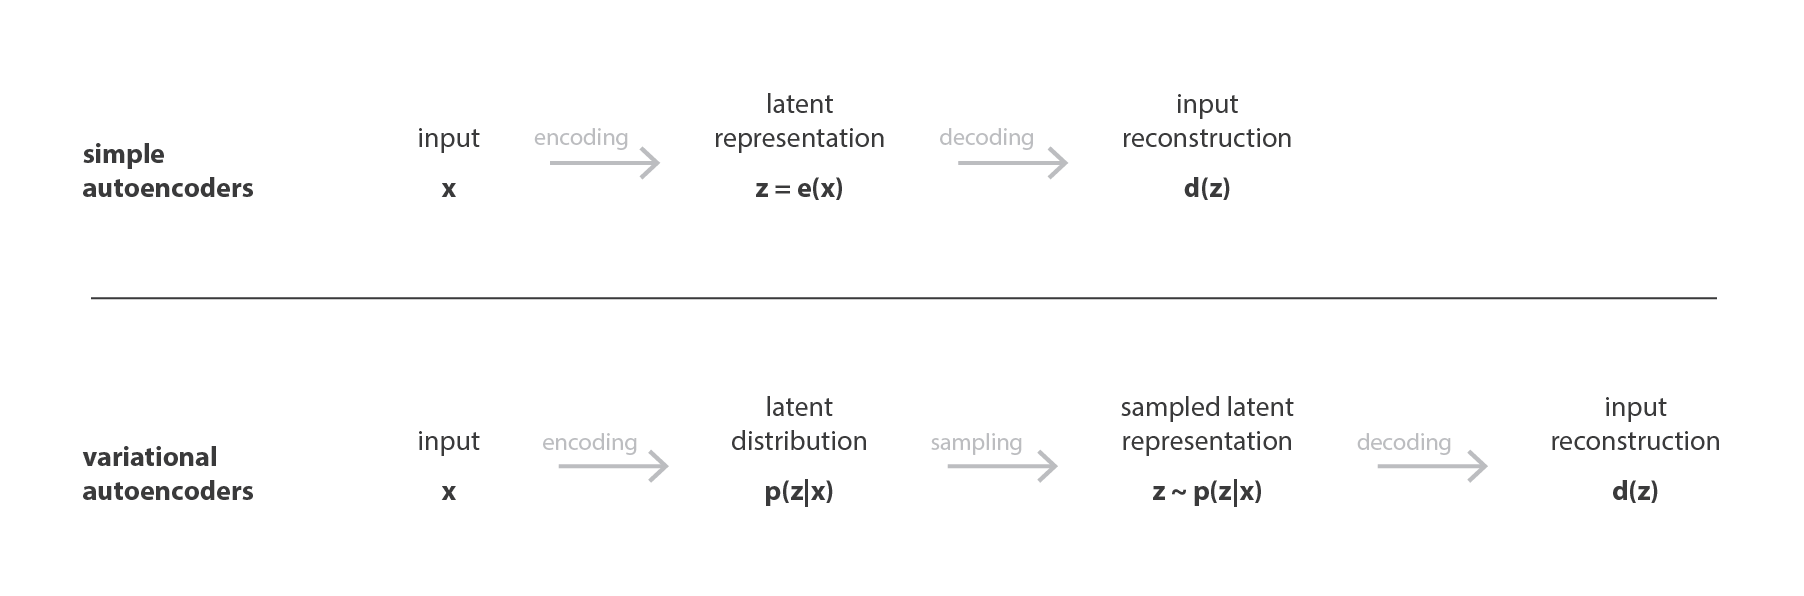

So, we can make the first change by replacing the latent state vector in the autoencoder with three layers:
<ol>
    <li> A mean layer </li>
    <li> A (log) variance layer </li>
    <li> A sampling layer </li>
</ol>

Each set of inputs maps to a single mean and the natural logarithm of the variance, which is sufficient to characterize a normal distribution. The model then randomly draws points from the distribution in the sampling layer.

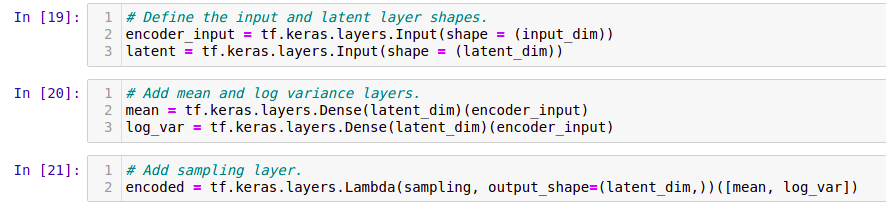

As was the case with the autoencoder model, our latent state is the output of the encoded layer. There is, however, an important difference: instead of mapping each set of inputs to a single latent state, we use the sampling layer to map them to random values drawn from a normal distribution with parameters mean and log_var. This means that the same input will be associated with a distribution of latent states.

The code block below defines a function that can be used to create a __sampling__ layer. It takes a mean and log variance as inputs. It then uses the random submodule of tensorflow to draw a tensor of points, epsilon, from a standard normal distribution, which has both a mean and a log variance of 0. We next want to transform these draws into draws from distributions characterized by the mean and log_var parameters. To do this, we need to first scale the draws, epsilon, by the standard deviations of the associated distributions. We can compute these standard deviations by dividing log_var by 2 and then exponentiating it. We then add the distribution means, mean.

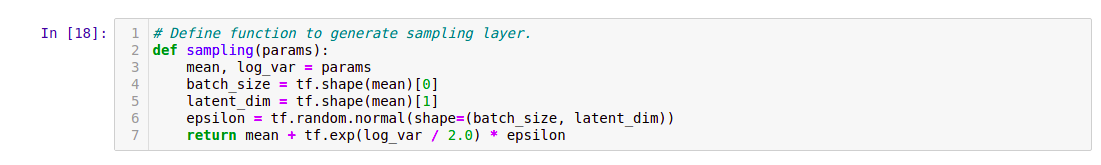

The loss function that is minimized when training a VAE is composed of a “reconstruction term” (on the final layer), that tends to make the encoding-decoding scheme as performant as possible, and a “regularisation term” (on the latent layer), that tends to regularise the organisation of the latent space by making the distributions returned by the encoder close to a standard normal distribution. That regularisation term is expressed as the Kulback-Leibler divergence between the returned distribution (latent space distributions, in our case) and the standard normal distribution.

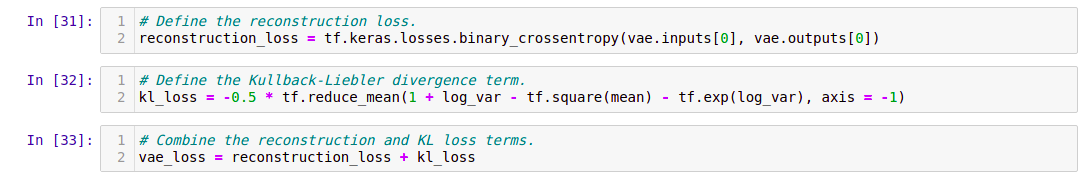

A natural question is why we would want to force each distribution to be close to a standard normal. The reason we do this is that we want to sample latent states and use them to generate music. If we apply the KL divergence penalty to the loss function, this will allow us to use independent draws from a standard normal distribution to obtain latent states that are likely to generate high quality pieces of music.

In mathematical statistics, __the Kullback–Leibler divergence $ 𝐷_{𝐾𝐿} $__ (also called __relative entropy__), is a measure of how one probability distribution is different from a second, reference probability distribution. In other words KL divergence helps us to measure just how much information we lose when we choose an approximation.

KL Divergence has its origins in information theory. The primary goal of information theory is to quantify how much information is in data. The most important metric in information theory is called Entropy, typically denoted as H. The definition of Entropy for a probability distribution is

$ 𝐻 = −\sum^N_{i = 1} p(x_i) \log p(x_i) $ <br><br>
The key thing with Entropy is that, simply knowing the theoretical lower bound on the number of bits we need, we have a way to quantify exactly how much information is in our data. Now that we can quantify this, we want to quantify how much information is lost when we substitute our observed distribution for a parameterized approximation.

### Measuring information lost using Kullback - Leibler Divergence

Kullback-Leibler Divergence is just a slight modification of our formula for entropy. Rather than just having our probability distribution $p$ we add in our approximating distribution $q$. Then we look at the difference of the log values for each:

$D_{KL}(p||q) = \sum_{i=1}{N} p(x_i) \cdot(\log p(x_i) - \log q(x_i))$ 

Essentially, what we're looking at with the KL divergence is the expectation of the log difference between the probability of data in the original distribution with the approximating distribution. If we think in terms of $log_2$ we can interpret this as "how many bits of information we expect to lose". We could rewrite our formula in terms of expectation:

$D_{KL}(p||q) = E[\log p(x) - \log q(x)]$

The more common way to see KL divergence written is as follows:

$D_{KL}(p||q) = \sum_{i=1}^{N} p(x_i) \cdot \log\frac{p(x_i)}{q(x_i)}$

### LSTM

It is difficult to compare models quantitatively. The only thing we can do is trust our ears. The track generated by LSTM sounds the best, the most harmonious. The results would have been better if we had used a larger set of data and polyphonic melodies.